In [1]:
%load_ext Cython

In [1]:
import numpy as np

In [2]:
from IPython.display import display

from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')
import sympy as sym

In [3]:
from sympy import *

In [4]:
x, y, z = sym.symbols("x y z")
k, m, n = sym.symbols("k m n", integer=True)
f, g, h = map(sym.Function, 'fgh')

In [6]:
%%time
diff(x**2, x)

CPU times: user 1.14 ms, sys: 23 µs, total: 1.17 ms
Wall time: 1.17 ms


2⋅x

In [8]:
%%time
diff(x**3, x)

CPU times: user 954 µs, sys: 20 µs, total: 974 µs
Wall time: 985 µs


   2
3⋅x 

In [14]:
%%time
diff(exp(x), x)

CPU times: user 1.16 ms, sys: 2 µs, total: 1.17 ms
Wall time: 1.18 ms


 x
ℯ 

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [16]:
def plot_derivatives(func, orders=[1], xrange=(0,1), yrange=None, npts=200):
    if not callable(func):
        raise ValueError('func must be callable')
    if isinstance(xrange, (list, tuple)):
        x = np.linspace(float(xrange[0]), float(xrange[1]), npts)
    else:
        x = xrange
    xs = sym.Symbol('x')
    fx = func(xs)
    f = sym.lambdify(xs, fx, modules=['numpy'])
    fig = plt.figure(figsize=(14, 6))
    ftex = sym.latex(fx).replace('$', '')
    plt.plot(x, f(x), label=r'$%s$' % (ftex), lw=2)
    apps = {}
    for order in orders:
        app = fx.diff(xs, order)
        apps[order] = app
        if isinstance(app, sym.numbers.Number):
            y = np.zeros_like(x)
            y.fill(app.evalf())
        else:
            fa = sym.lambdify(xs, app, modules=['numpy'])
            y = fa(x)
        tex = sym.latex(app).replace('$', '')
        plt.plot(x, y, label=r'$n=%s:\, %s$' % (order, tex) )
    plt.legend(loc='best').get_frame().set_alpha(0.8)

CPU times: user 40.8 ms, sys: 3.75 ms, total: 44.5 ms
Wall time: 42.7 ms


/Users/sharansajivmenon/opt/anaconda3/lib/python3.8/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.core.numbers with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.core.numbers instead. See
https://github.com/sympy/sympy/issues/18245 for more info.

  self.Warn(
/Users/sharansajivmenon/opt/anaconda3/lib/python3.8/site-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.core.numbers with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.core.numbers instead. See
https://github.com/sympy/sympy/issues/18245 for more info.

  self.Warn(


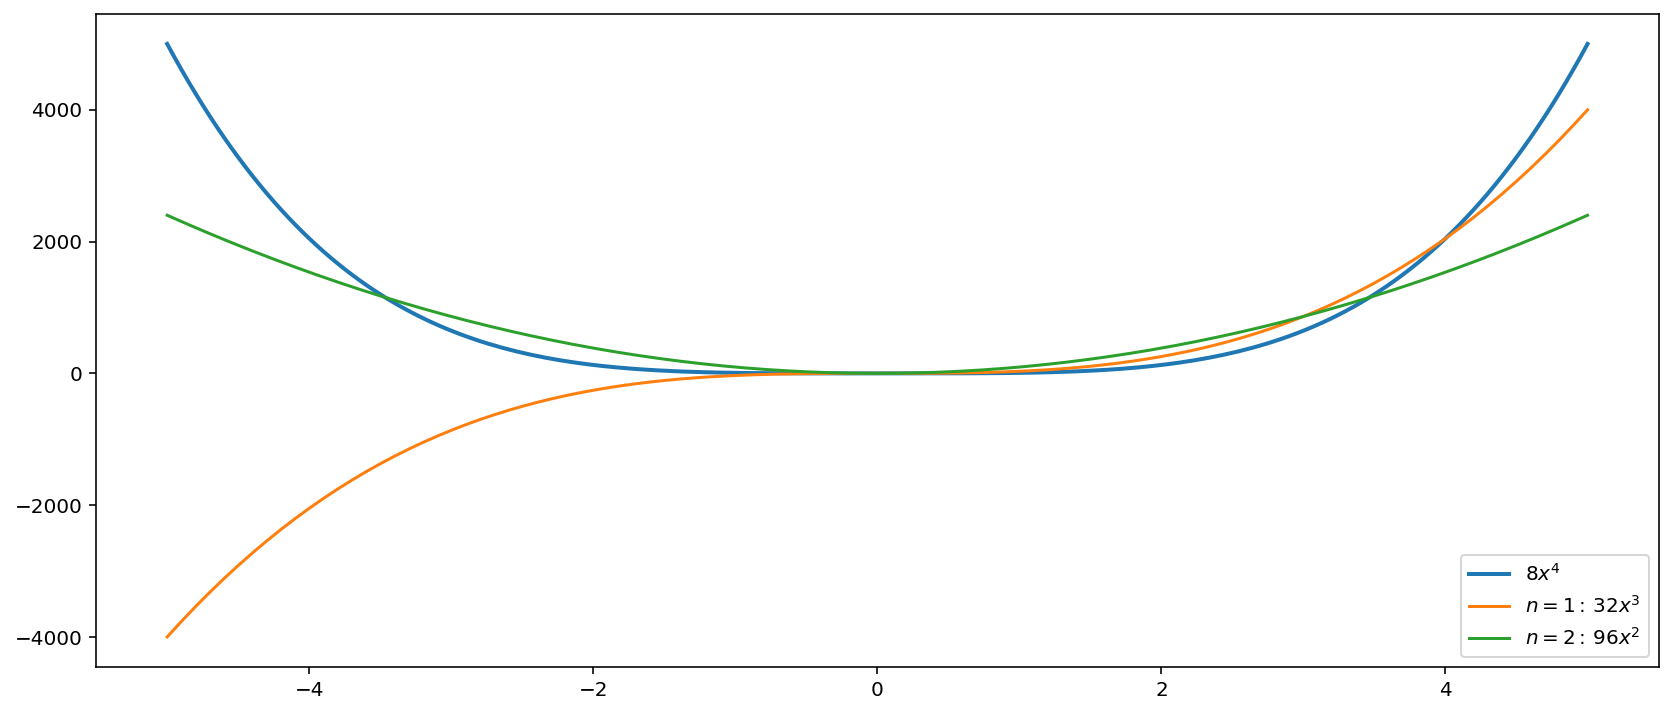

In [22]:
%%time
plot_derivatives(lambda x: 8*x**4, orders=[1,2], xrange=(-5, 5))